In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For better visualizations
import yfinance as yf
from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go  # For candlestick chart

# Load the dataset
data= pd.read_csv(r"E:\Stochastic\NIFTY 50.csv")

data = data[data.columns[0:5]]
data = data[:5348]

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Resample the data to monthly frequency
obs = data.resample('M').agg({'Open': 'first','High': 'max','Low': 'min','Close': 'last'})

# Reset the index to have 'Date' as a column again
obs = obs.reset_index()

# Print the monthly data
print(obs)

data = obs[:162]

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

          Date      Open      High       Low     Close
0   2000-01-31   1482.15   1671.15   1482.15   1546.20
1   2000-02-29   1546.20   1818.15   1521.40   1654.80
2   2000-03-31   1661.50   1773.85   1489.10   1528.45
3   2000-04-30   1528.70   1636.95   1311.30   1406.55
4   2000-05-31   1410.00   1436.60   1201.50   1380.45
..         ...       ...       ...       ...       ...
253 2021-02-28  13758.60  15431.75  13661.75  14529.15
254 2021-03-31  14702.50  15336.30  14264.40  14690.70
255 2021-04-30  14798.40  15044.35  14151.40  14631.10
256 2021-05-31  14481.05  15606.35  14416.25  15582.80
257 2021-06-30  15629.65  15915.65  15450.90  15721.50

[258 rows x 5 columns]
First few rows of the dataset:
        Date     Open     High      Low    Close
0 2000-01-31  1482.15  1671.15  1482.15  1546.20
1 2000-02-29  1546.20  1818.15  1521.40  1654.80
2 2000-03-31  1661.50  1773.85  1489.10  1528.45
3 2000-04-30  1528.70  1636.95  1311.30  1406.55
4 2000-05-31  1410.00  1436.60  1201.50 

C:\Users\praga\AppData\Local\Temp\ipykernel_28504\1169439147.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  obs = data.resample('M').agg({'Open': 'first','High': 'max','Low': 'min','Close': 'last'})



Basic Statistics:
                      Date         Open         High          Low        Close
count                  162   162.000000   162.000000   162.000000   162.000000
mean   2006-10-15 08:26:40  3271.361420  3444.154012  3087.364506  3294.229938
min    2000-01-31 00:00:00   914.650000   983.600000   849.950000   913.850000
25%    2003-06-07 12:00:00  1430.812500  1565.187500  1299.412500  1430.687500
50%    2006-10-15 12:00:00  3073.575000  3337.200000  2887.325000  3101.450000
75%    2010-02-21 00:00:00  5104.150000  5295.700000  4764.212500  5124.662500
max    2013-06-30 00:00:00  6177.450000  6357.100000  5937.100000  6138.600000
std                    NaN  1808.146819  1870.455445  1715.101867  1809.145584

Missing Values in Each Column:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


C:\Users\praga\AppData\Local\Temp\ipykernel_28504\2522291112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime


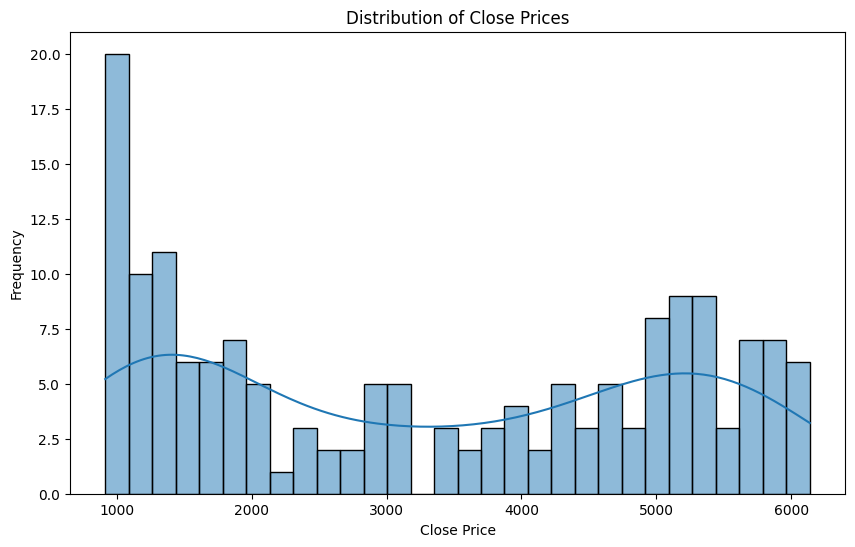

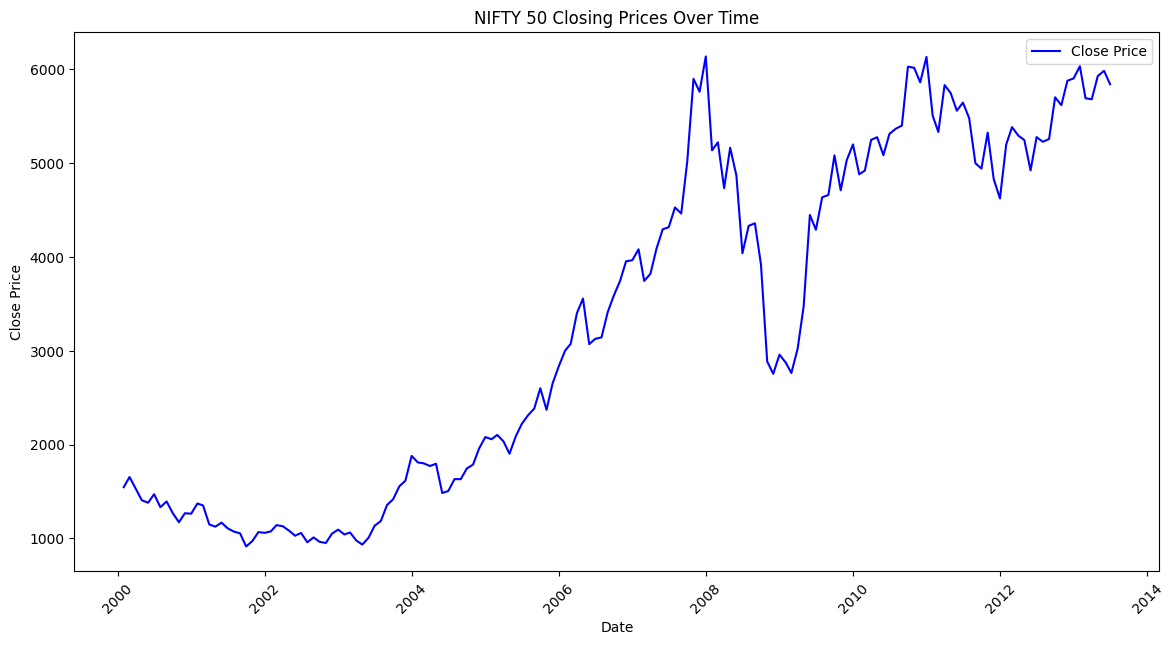

C:\Users\praga\AppData\Local\Temp\ipykernel_28504\2522291112.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_50'] = data['Close'].rolling(window=50).mean()
C:\Users\praga\AppData\Local\Temp\ipykernel_28504\2522291112.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_200'] = data['Close'].rolling(window=200).mean()


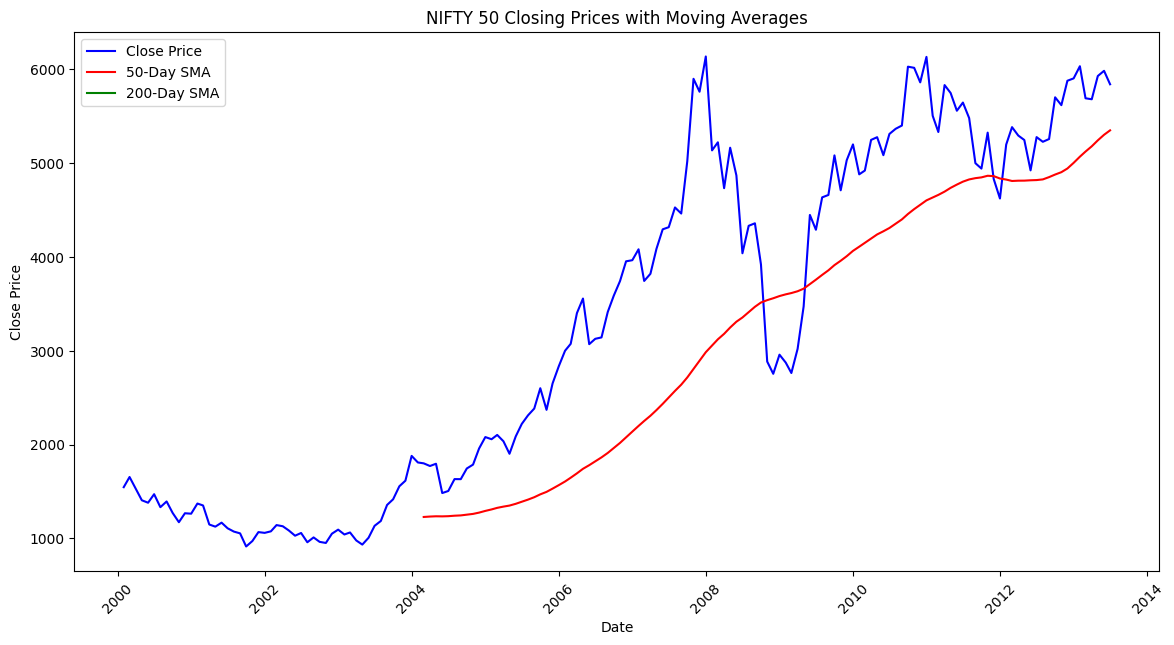

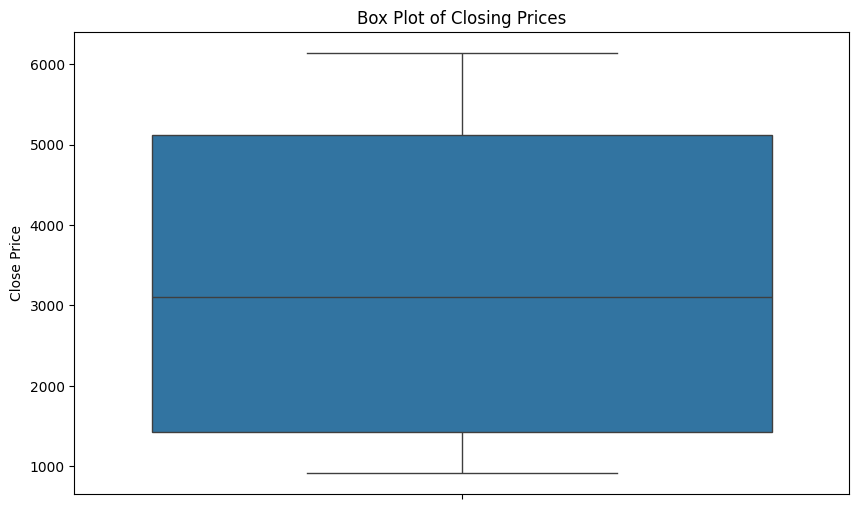

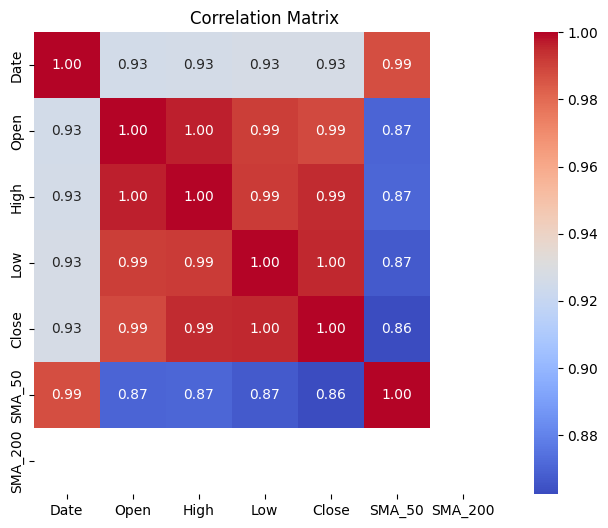

C:\Users\praga\AppData\Local\Temp\ipykernel_28504\2522291112.py:72: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



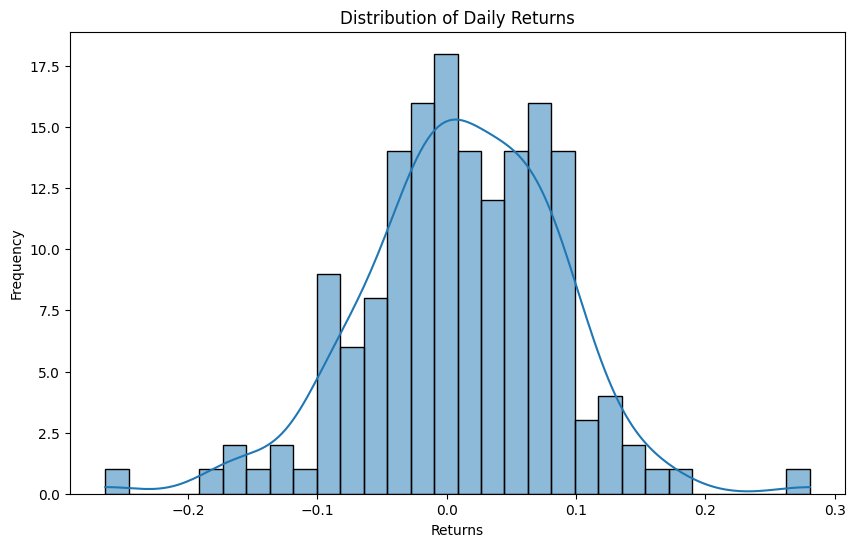

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime

# Now, calculate the correlation matrix
correlation_matrix = data.corr()


# Display basic statistics of the dataset
print("\nBasic Statistics:")
print(data.describe())
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Visualize the distribution of 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Time Series Plot of Closing Prices
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('NIFTY 50 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Calculate Moving Average
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Plotting Closing Prices with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['SMA_50'], label='50-Day SMA', color='red')
plt.plot(data['Date'], data['SMA_200'], label='200-Day SMA', color='green')
plt.title('NIFTY 50 Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                      open=data['Open'],
                                      high=data['High'],
                                      low=data['Low'],
                                      close=data['Close'])])
fig.update_layout(title='NIFTY 50 Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

# Box Plot of Closing Prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Close'])
plt.title('Box Plot of Closing Prices')
plt.ylabel('Close Price')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Histogram of Returns
plt.figure(figsize=(10, 6))
sns.histplot(data['Returns'].dropna(), bins=30, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data = data[data.columns[1:5]]
obs = obs[obs.columns[1:5]]
# Calculate number of rows and set training window
T = data.shape[0]
print("T= ", T)

# Define the size of the training window
d = 96
D = 96
hmm_price = []

temp_T = T
first_time = True

# Sliding window approach to predict future prices
while T < temp_T + d:

    # Train HMM on data from T-D+1 to T
    train_data = obs.iloc[T-D:T]
    train_data = train_data.dropna()

    # Set the random seed
    np.random.seed(123)

    if(first_time):
      first_time = False
      model = hmm.GaussianHMM(n_components=5)
    else:
      old_model= model
      model = hmm.GaussianHMM(n_components=5, init_params="c")
      model.startprob_ = old_model.startprob_
      model.transmat_ = old_model.transmat_
      model.means_ = old_model.means_

    model.fit(train_data)

    # Calculate original likelihood
    original_likelihood = model.score(train_data)

    # Loop to find new likelihood
    t=T
    min_diff = float('inf')
    min_t = T
    min_likelihood = original_likelihood
    while t-D>  0:
        t = t-1

        train_data = obs.iloc[t-D:t]
        new_likelihood = model.score(train_data)
        if (abs(new_likelihood - original_likelihood))< min_diff:  # Threshold for comparison by choosing that new_likelihood which is minimum
            min_diff = abs(new_likelihood - original_likelihood)
            min_t = t
            min_likelihood = new_likelihood

    # Calculate the predicted close price
    close_price = obs['Close'][T-1] + ((obs['Close'][min_t + 1] - obs['Close'][min_t]) * np.sign(original_likelihood - min_likelihood))

    hmm_price.append(close_price)
    T=T+1

# Print the calculated prices
print("HMM Prices: ")
print(hmm_price)
# Plot the predicted and observed prices
close = []
truncated_obs = obs.iloc[T-d:T]

for i in truncated_obs['Close']:
  close.append(i)


T=  162
HMM Prices: 
[np.float64(5742.0), np.float64(5471.8), np.float64(5735.3), np.float64(5171.450000000001), np.float64(6176.1), np.float64(6304.0), np.float64(6089.5), np.float64(6276.95), np.float64(6704.2), np.float64(6696.4), np.float64(6508.95), np.float64(6802.7), np.float64(7603.55), np.float64(7908.75), np.float64(7943.900000000001), np.float64(7431.25), np.float64(8855.75), np.float64(8893.8), np.float64(7756.500000000002), np.float64(9074.949999999999), np.float64(8596.300000000001), np.float64(8583.95), np.float64(8433.65), np.float64(8368.5), np.float64(8532.85), np.float64(8697.2), np.float64(7409.75), np.float64(8065.8), np.float64(7935.25), np.float64(7946.35), np.float64(7957.450000000001), np.float64(7433.0), np.float64(7738.4), np.float64(7855.3), np.float64(7961.200000000001), np.float64(8137.7), np.float64(8222.6), np.float64(8076.95), np.float64(8375.35), np.float64(8992.55), np.float64(8735.650000000001), np.float64(8411.95), np.float64(8147.1), np.float64(887

In [ ]:
# Scaling the data to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(obs['Close'].values.reshape(-1, 1))

# Prepare data for LSTM model (using the first D months)
def prepare_data(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = obs.shape[0] - D

# Initialize an empty list to store the predictions
lstm_predictions = []

# Initial training on the first 162 months
X_train, y_train = prepare_data(scaled_data, D)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Train the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32)

# Iteratively predict the next 96 months and retrain the model
for i in range(96):  # Predict the next 96 months
    X_input = scaled_data[-time_step:]  # Use the last 'time_step' months for prediction
    X_input = X_input.reshape(1, time_step, 1)
    pred = model_lstm.predict(X_input)
    lstm_predictions.append(pred[0, 0])

    # Add the predicted data to the training set
    new_data = np.append(scaled_data[:time_step + i + 1], pred)
    scaled_data = np.append(scaled_data, pred).reshape(-1, 1)

    # Re-prepare the training data including the new data
    X_train, y_train = prepare_data(scaled_data[:time_step + i + 1], time_step)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

    # Retrain the LSTM model with the updated data
    model_lstm.fit(X_train, y_train, epochs=5, batch_size=32)

# Inverse transform the predictions to the original scale
lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1, 1))

# LSTM predictions for the next 96 months
print(lstm_predictions.shape)

Epoch 1/5


c:\Users\praga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2232
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0154
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0190
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0112
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step - loss: 0.0047
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0049
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0046
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0039
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0032
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0021
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0012
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5.4588e-04
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/ste

In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(obs['Close'].values.reshape(-1, 1))

# Prepare data function for RNN model
def prepare_data(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = obs.shape[0] - D  # D is the training window size

# Initialize an empty list to store the predictions
rnn_predictions = []

# Initial training on the first 162 months
X_train, y_train = prepare_data(scaled_data, time_step)

print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Train the initial RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_rnn.add(SimpleRNN(units=50))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train, y_train, epochs=5, batch_size=32)

# Iteratively predict the next month and retrain the model
for i in range(96):  # Predict the next 96 months iteratively
    # Predict the next month
    X_input = scaled_data[-time_step:]  # Use the last 'time_step' months for prediction
    X_input = X_input.reshape(1, time_step, 1)
    pred = model_rnn.predict(X_input)
    rnn_predictions.append(pred[0, 0])

    # Add the real data for the next month to the training set
    new_data = np.append(scaled_data[:time_step + i + 1], pred)
    scaled_data = np.append(scaled_data, pred).reshape(-1, 1)

    # Re-prepare the training data including the new data
    X_train, y_train = prepare_data(scaled_data[:time_step + i + 1], time_step)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

    # Retrain the RNN model with the updated data
    model_rnn.fit(X_train, y_train, epochs=5, batch_size=32)

# Inverse transform the predictions to the original scale
rnn_predictions = scaler.inverse_transform(np.array(rnn_predictions).reshape(-1, 1))

# rnn_predictions now contains the predicted closing prices for the next 96 months
print(rnn_predictions.shape)


(96, 162)
Epoch 1/5


c:\Users\praga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2492 
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0817
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0473
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0629
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0336
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step - loss: 0.1247
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1066
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0604
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0173
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.2690e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0105
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0352
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0515
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0484
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/st

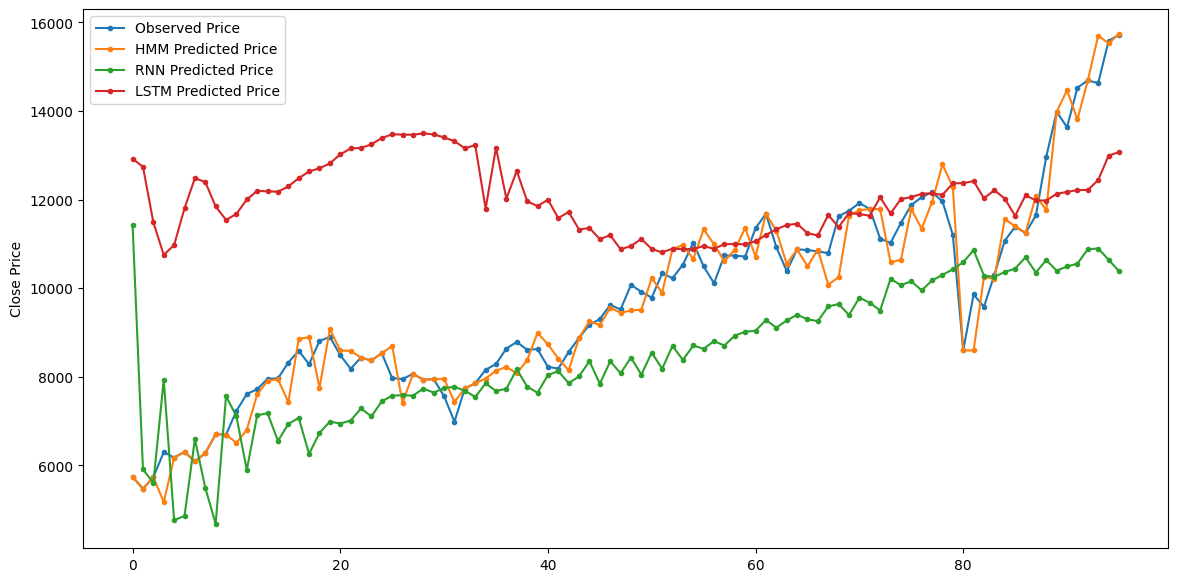

In [ ]:
plt.figure(figsize=(14, 7))

# Plot actual prices for the corresponding period
plt.plot(close, marker='.', label='Observed Price')

# Plot HMM predicted prices
plt.plot(hmm_price, marker='.', label='HMM Predicted Price')

# Plot RNN predicted prices
plt.plot(rnn_predictions, marker='.', label='RNN Predicted Price')

# Plot LSTM predicted prices
plt.plot(lstm_predictions, marker='.', label='LSTM Predicted Price')

plt.ylabel("Close Price")
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Convert lists to numpy arrays
close = np.array(close)
hmm_price = np.array(hmm_price)
lstm_predictions = np.array(lstm_predictions)
rnn_predictions = np.array(rnn_predictions)

# Ensure all are trimmed to the same length
min_length = min(len(close), len(hmm_price), len(lstm_predictions), len(rnn_predictions))
print(min_length)
close = close[-min_length:]
hmm_price = hmm_price[-min_length:]
lstm_predictions = lstm_predictions[-min_length:]
rnn_predictions = rnn_predictions[-min_length:]

# 1. Absolute Percentage Error (APE)
def ape(real_, pred_):
    APE = 0
    sum = 0
    N = len(real_)
    # Calculate the sum of absolute differences between real and predicted values
    for i in range(1, N):
        sum += (np.abs(real_[i] - pred_[i])) / N

    # Calculate APE as a ratio of the sum to the mean of real values
    APE = sum / (np.mean(real_))

    return APE

ape_hmm = ape(close, hmm_price)
ape_lstm = ape(close, lstm_predictions)
ape_rnn = ape(close, rnn_predictions)

# 2. Average Absolute Error (AAE)
def aae(real_, pred_):
    AAE = 0
    sum = 0
    N = len(real_)
    for i in range(1, N):
        sum += (np.abs(real_[i] - pred_[i])) / N
    AAE = sum
    return AAE

aae_hmm = aae(close, hmm_price)
aae_lstm = aae(close, lstm_predictions)
aae_rnn = aae(close, rnn_predictions)

# 3. Average Relative Percentage Error (ARPE)
def arpe(real_, pred_):
    sum = 0
    N = len(real_)
    for i in range(1, N):
        sum += (np.abs(real_[i] - pred_[i])) / N
    ARPE = sum / N
    return ARPE

arpe_hmm = arpe(close, hmm_price)
arpe_lstm = arpe(close, lstm_predictions)
arpe_rnn = arpe(close, rnn_predictions)

# 4. Root Mean Squared Error (RMSE)
def rmse(real_, pred_):
    sum = 0
    N = len(real_)
    for i in range(1, N):
        sum += (np.square(real_[i] - pred_[i])) / N
    RMSE = np.sqrt(sum)
    return RMSE

rmse_hmm = rmse(close, hmm_price)
rmse_lstm = rmse(close, lstm_predictions)
rmse_rnn = rmse(close, rnn_predictions)

# 6. Efficiency Calculation
def efficiency(hmm_metric, other_metric):
    return 1 - (hmm_metric / other_metric)

eff_lstm = {
    'APE': efficiency(ape_hmm, ape_lstm),
    'AAE': efficiency(aae_hmm, aae_lstm),
    'ARPE': efficiency(arpe_hmm, arpe_lstm),
    'RMSE': efficiency(rmse_hmm, rmse_lstm),
}

eff_rnn = {
    'APE': efficiency(ape_hmm, ape_rnn),
    'AAE': efficiency(aae_hmm, aae_rnn),
    'ARPE': efficiency(arpe_hmm, arpe_rnn),
    'RMSE': efficiency(rmse_hmm, rmse_rnn),
}

# Print the results
print("HMM vs LSTM Efficiency:", eff_lstm)
print("HMM vs RNN Efficiency:", eff_rnn)

# Print the results
print("LSTM Metrics:")
print("APE:", ape_lstm)
print("AAE:", aae_lstm)
print("ARPE:", arpe_lstm)
print("RMSE:", rmse_lstm)

print("\nRNN Metrics:")
print("APE:", ape_rnn)
print("AAE:", aae_rnn)
print("ARPE:", arpe_rnn)
print("RMSE:", rmse_rnn)

96
HMM vs LSTM Efficiency: {'APE': array([0.86715614]), 'AAE': array([0.86715614]), 'ARPE': array([0.86715614]), 'RMSE': array([0.84962599])}
HMM vs RNN Efficiency: {'APE': array([0.75377295]), 'AAE': array([0.75377295]), 'ARPE': array([0.75377295]), 'RMSE': array([0.71077716])}
LSTM Metrics:
APE: [0.2731612]
AAE: [2644.22660726]
ARPE: [27.54402716]
RMSE: [3355.57994584]

RNN Metrics:
APE: [0.14737531]
AAE: [1426.60715332]
ARPE: [14.86049118]
RMSE: [1744.64787901]


In [ ]:
# Convert lists to numpy arrays
close = np.array(close)
lstm_predictions = np.array(lstm_predictions).flatten()  # Flatten the array
rnn_predictions = np.array(rnn_predictions).flatten()  # Flatten the array

# Ensure all are trimmed to the same length
min_length = min(len(close), len(lstm_predictions), len(rnn_predictions))
print("Minimum length for comparison:", min_length)
close = close[-min_length:]
lstm_predictions = lstm_predictions[-min_length:]
rnn_predictions = rnn_predictions[-min_length:]

# Print actual vs predicted values for debugging
print("Actual Prices:", close)
print("LSTM Predictions:", lstm_predictions)
print("RNN Predictions:", rnn_predictions)

# Define a function to calculate accuracy score based on a threshold
def accuracy_score(real_, pred_, threshold):
    correct_predictions = np.sum(np.abs(real_ - pred_) <= threshold)
    return correct_predictions / len(real_)

# Define a more lenient threshold (for example, 20% of the actual price)
threshold = 0.20 * np.mean(close)  # 20% of the average actual price

# Calculate accuracy scores for LSTM and RNN
accuracy_lstm = accuracy_score(close, lstm_predictions, threshold)
accuracy_rnn = accuracy_score(close, rnn_predictions, threshold)

# Print the results
print("LSTM Accuracy Score:", accuracy_lstm)
print("RNN Accuracy Score:", accuracy_rnn)

Minimum length for comparison: 96
Actual Prices: [ 5742.    5471.8   5735.3   6299.15  6176.1   6304.    6089.5   6276.95
  6704.2   6696.4   7229.95  7611.35  7721.3   7954.35  7964.8   8322.2
  8588.25  8282.7   8808.9   8901.85  8491.    8181.5   8433.65  8368.5
  8532.85  7971.3   7948.9   8065.8   7935.25  7946.35  7563.55  6987.05
  7738.4   7849.8   8160.1   8287.75  8638.5   8786.2   8611.15  8625.7
  8224.5   8185.8   8561.3   8879.6   9173.75  9304.05  9621.25  9520.9
 10077.1   9917.9   9788.6  10335.3  10226.55 10530.7  11027.7  10492.85
 10113.7  10739.35 10736.15 10714.3  11356.5  11680.5  10930.45 10386.6
 10876.75 10862.55 10830.95 10792.5  11623.9  11748.15 11922.8  11788.85
 11118.   11023.25 11474.45 11877.45 12056.05 12168.45 11962.1  11201.75
  8597.75  9859.9   9580.3  10302.1  11073.45 11387.5  11247.55 11642.4
 12968.95 13981.75 13634.6  14529.15 14690.7  14631.1  15582.8  15721.5 ]
LSTM Predictions: [12922.311  12740.833  11487.269  10752.747  10975.122  11803.

In [ ]:
hmm_price = hmm_price[-min_length:]
print("Actual Prices:", close)
print("HMM Predictions:", hmm_price)

accuracy_hmm = accuracy_score(close, hmm_price, threshold)

print("HMM Accuracy Score:", accuracy_hmm)

Actual Prices: [ 5742.    5471.8   5735.3   6299.15  6176.1   6304.    6089.5   6276.95
  6704.2   6696.4   7229.95  7611.35  7721.3   7954.35  7964.8   8322.2
  8588.25  8282.7   8808.9   8901.85  8491.    8181.5   8433.65  8368.5
  8532.85  7971.3   7948.9   8065.8   7935.25  7946.35  7563.55  6987.05
  7738.4   7849.8   8160.1   8287.75  8638.5   8786.2   8611.15  8625.7
  8224.5   8185.8   8561.3   8879.6   9173.75  9304.05  9621.25  9520.9
 10077.1   9917.9   9788.6  10335.3  10226.55 10530.7  11027.7  10492.85
 10113.7  10739.35 10736.15 10714.3  11356.5  11680.5  10930.45 10386.6
 10876.75 10862.55 10830.95 10792.5  11623.9  11748.15 11922.8  11788.85
 11118.   11023.25 11474.45 11877.45 12056.05 12168.45 11962.1  11201.75
  8597.75  9859.9   9580.3  10302.1  11073.45 11387.5  11247.55 11642.4
 12968.95 13981.75 13634.6  14529.15 14690.7  14631.1  15582.8  15721.5 ]
HMM Predictions: [ 5742.    5471.8   5735.3   5171.45  6176.1   6304.    6089.5   6276.95
  6704.2   6696.4   6508

In [ ]:
import pickle

# Assuming `model` is your trained HMM model
with open('hmm_model.pkl', 'wb') as file:
    pickle.dump(model, file)